In [2]:
# GRUPO 1: PURO HUESO
                # NOTEBOOK 2
                            # ANALISIS DE DATASET

In [3]:
#1 Importar librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [4]:
#2 leer archivo csv
df = pd.read_csv('defunciones_limpio.csv')

In [5]:
#3 Chequeamos que leyó el archivo
df.head()

,Unnamed: 0,region,jurisdiccion,sexo,grupo_etario,causa_defuncion,anio
0,0,Centro,Bs As,Varones,1,AFECC PERINATALES,2015
1,1,Centro,Bs As,Varones,1,MALFORM CONGENITAS,2015
2,2,Centro,Bs As,Varones,1,MALFORM CONGENITAS,2015
3,3,Centro,Bs As,Varones,1,ENF SISTEMA RESPIRATORIO,2015
4,4,Centro,Bs As,Varones,1,AFECC PERINATALES,2015


In [ ]:
#Analisis del DS

In [61]:
df.shape

(2506316, 7)

In [76]:
df.dtypes

Index               int64
region             object
jurisdiccion       object
sexo               object
grupo_etario        int64
causa_defuncion    object
anio                int64
dtype: object

In [62]:
# Estadística descriptiva

In [63]:
df.describe()

,Index,grupo_etario,anio
count,2.506316e+06,2.506316e+06,2.506316e+06
mean,1.258495e+06,5.632429e+00,2.018137e+03
std,7.268130e+05,1.604248e+00,2.037981e+00
min,0.000000e+00,1.000000e+00,2.015000e+03
25%,6.293618e+05,5.000000e+00,2.016000e+03
50%,1.257888e+06,6.000000e+00,2.018000e+03
75%,1.888232e+06,7.000000e+00,2.020000e+03
max,2.516783e+06,8.000000e+00,2.021000e+03


In [ ]:
# Columnas

In [7]:
df.columns

Index(['Unnamed: 0', 'region', 'jurisdiccion', 'sexo', 'grupo_etario',
       'causa_defuncion', 'anio'],
      dtype='object')

In [8]:
df['Unnamed: 0'].unique()

array([      0,       1,       2, ..., 2516781, 2516782, 2516783],
      dtype=int64)

In [9]:
# Renombrar columna
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
df.columns

Index(['Index', 'region', 'jurisdiccion', 'sexo', 'grupo_etario',
       'causa_defuncion', 'anio'],
      dtype='object')

In [64]:
## Análisis exploratorio 

In [10]:
#ANÁLISIS DE LA FEATURE REGIÓN

In [11]:
#Categorias que contiene la Variable

In [12]:
df['region'].unique()

array(['Centro', 'Cuyo2', 'NOA1', 'PatSur', 'NEA', 'NOA2', 'NOA',
       'Pat Norte', 'Cuyo1'], dtype=object)

In [13]:
#Cantidad por Categoria

In [14]:
def_reg=df['region'].value_counts()
print(def_reg)

Centro       1763355
NEA           194110
Cuyo1         105357
NOA1           94419
NOA            83192
Pat Norte      80291
Cuyo2          80016
NOA2           64045
PatSur         41531
Name: region, dtype: int64


In [15]:
#Porcentaje por Categoria

In [16]:
100 * df['region'].value_counts() / len(df['region'])

Centro       70.356451
NEA           7.744833
Cuyo1         4.203660
NOA1          3.767242
NOA           3.319294
Pat Norte     3.203547
Cuyo2         3.192574
NOA2          2.555344
PatSur        1.657054
Name: region, dtype: float64

In [17]:
# Cantidad de defunciones por region segun rango etario

In [18]:
df.groupby(['grupo_etario'])['region'].value_counts()

grupo_etario  region
1             Centro    42960
              NEA       10784
              NOA1       5026
              NOA        3555
              Cuyo1      3008
                        ...  
8             NOA          20
              Cuyo2        12
              Cuyo1         8
              PatSur        7
              NOA1          5
Name: region, Length: 72, dtype: int64

In [19]:
#Grafico Cantidad de defunciónes segun region

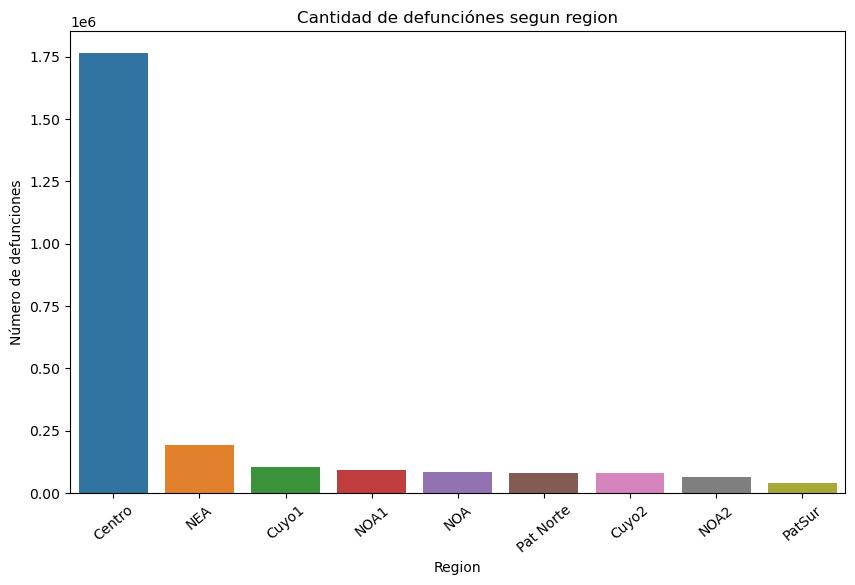

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=def_reg.index, y=def_reg.values)
plt.xlabel("Region")
plt.ylabel("Número de defunciones")
plt.title("Cantidad de defunciónes segun region")
plt.xticks(rotation=40)
plt.show()

#ANÁLISIS DE LA FEATURE CAUSA

In [21]:
#Categorias que contiene la Variable

In [22]:
df['causa_defuncion'].unique()

array([' AFECC  PERINATALES', ' MALFORM  CONGENITAS',
       ' ENF SISTEMA RESPIRATORIO', ' TRAST METABOLICOS',
       ' CIERTAS ENF INFECCIOSAS Y PARASITARIAS', ' SIGNOS',
       ' ENF  DEL SISTEMA URINARIO', ' ENF  DEL SISTEMA CIRCULATORIO',
       ' DEMAS CAUSAS DEFINIDAS', ' CAUSAS EXTERNAS', ' T MALIGNOS',
       ' ENF  DEL HIGADO', ' DIABETES MELLITUS',
       ' TRASTORNOS MENTALES Y DEL COMP', ' EMBARAZO', ' C IN SITU',
       ' APEND ', ' MENINGITIS', ' ENF  DE ALZHEIMER',
       ' DEF  Y ANEMIAS NUTRICION'], dtype=object)

In [ ]:
#Dist y outliers

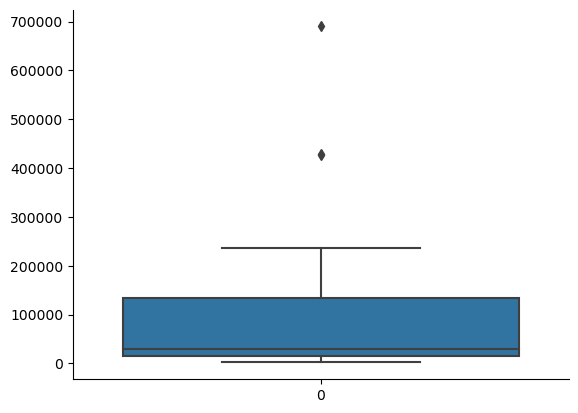

In [86]:
sns.boxplot(df['causa_defuncion'].value_counts())
sns.despine()

In [23]:
#Cantidad por Categoria

In [24]:
def_causa=df['causa_defuncion'].value_counts()
print(def_causa)

 ENF  DEL SISTEMA CIRCULATORIO             689813
 T MALIGNOS                                428686
 ENF SISTEMA RESPIRATORIO                  426331
 CIERTAS ENF INFECCIOSAS Y PARASITARIAS    235415
 SIGNOS                                    156040
 CAUSAS EXTERNAS                           127476
 DEMAS CAUSAS DEFINIDAS                    122731
 ENF  DEL SISTEMA URINARIO                  91829
 DIABETES MELLITUS                          65546
 ENF  DEL HIGADO                            39724
 AFECC  PERINATALES                         21100
 C IN SITU                                  19431
 TRASTORNOS MENTALES Y DEL COMP             18793
 TRAST METABOLICOS                          15085
 MALFORM  CONGENITAS                        14816
 APEND                                      13074
 ENF  DE ALZHEIMER                          10359
 DEF  Y ANEMIAS NUTRICION                    5975
 EMBARAZO                                    2116
 MENINGITIS                                  1976


In [25]:
#Porcentaje de defunciones segun causas


In [26]:
100 * df['causa_defuncion'].value_counts() / len(df['causa_defuncion'])

 ENF  DEL SISTEMA CIRCULATORIO             27.522986
 T MALIGNOS                                17.104228
 ENF SISTEMA RESPIRATORIO                  17.010265
 CIERTAS ENF INFECCIOSAS Y PARASITARIAS     9.392870
 SIGNOS                                     6.225871
 CAUSAS EXTERNAS                            5.086190
 DEMAS CAUSAS DEFINIDAS                     4.896869
 ENF  DEL SISTEMA URINARIO                  3.663904
 DIABETES MELLITUS                          2.615233
 ENF  DEL HIGADO                            1.584956
 AFECC  PERINATALES                         0.841873
 C IN SITU                                  0.775281
 TRASTORNOS MENTALES Y DEL COMP             0.749826
 TRAST METABOLICOS                          0.601879
 MALFORM  CONGENITAS                        0.591147
 APEND                                      0.521642
 ENF  DE ALZHEIMER                          0.413316
 DEF  Y ANEMIAS NUTRICION                   0.238398
 EMBARAZO                                   0.

In [27]:
#Mayores Causas de Defuncion

In [28]:
top_causas=df['causa_defuncion'].value_counts().head(5)
print(top_causas)

 ENF  DEL SISTEMA CIRCULATORIO             689813
 T MALIGNOS                                428686
 ENF SISTEMA RESPIRATORIO                  426331
 CIERTAS ENF INFECCIOSAS Y PARASITARIAS    235415
 SIGNOS                                    156040
Name: causa_defuncion, dtype: int64


In [29]:
#Maxima Causa de Defuncion

In [65]:
df['causa_defuncion'].value_counts().max()


689813

In [31]:
#Menores Causas de Defuncion

In [32]:
top_min_causas=df['causa_defuncion'].value_counts().tail(5)
print(top_min_causas)

 APEND                       13074
 ENF  DE ALZHEIMER           10359
 DEF  Y ANEMIAS NUTRICION     5975
 EMBARAZO                     2116
 MENINGITIS                   1976
Name: causa_defuncion, dtype: int64


In [33]:
#Menor Causa de Defuncion

In [66]:
df['causa_defuncion'].value_counts().min()


1976

In [35]:
# Causas de defuncion segun rango etario

In [36]:
df.groupby(['grupo_etario'])['causa_defuncion'].value_counts()

grupo_etario  causa_defuncion                
1              AFECC  PERINATALES                21100
               CAUSAS EXTERNAS                   16219
               MALFORM  CONGENITAS               13495
               ENF SISTEMA RESPIRATORIO           5174
               DEMAS CAUSAS DEFINIDAS             4205
                                                 ...  
8              TRASTORNOS MENTALES Y DEL COMP       54
               DEF  Y ANEMIAS NUTRICION             30
               ENF  DE ALZHEIMER                    28
               MENINGITIS                           12
               MALFORM  CONGENITAS                  11
Name: causa_defuncion, Length: 149, dtype: int64

In [37]:
# Causas de defuncion segun año

In [82]:
pd.crosstab(index=df['anio'],
            columns=df['causa_defuncion'], margins=True)


causa_defuncion,AFECC PERINATALES,APEND,C IN SITU,CAUSAS EXTERNAS,CIERTAS ENF INFECCIOSAS Y PARASITARIAS,DEF Y ANEMIAS NUTRICION,DEMAS CAUSAS DEFINIDAS,DIABETES MELLITUS,EMBARAZO,ENF DE ALZHEIMER,...,ENF DEL SISTEMA CIRCULATORIO,ENF DEL SISTEMA URINARIO,ENF SISTEMA RESPIRATORIO,MALFORM CONGENITAS,MENINGITIS,SIGNOS,T MALIGNOS,TRAST METABOLICOS,TRASTORNOS MENTALES Y DEL COMP,All
anio,,,,,,,,,,,,,,,,,,,,,
2015,3708,2004,2848,20123,13528,969,17161,9210,331,1421,...,95966,12667,56816,2614,307,19512,62467,2058,2589,332326
2016,3476,2016,3075,19016,13756,939,18406,9544,286,1701,...,101377,13084,64816,2450,327,22553,62433,2360,2851,350682
2017,3390,1895,2762,19280,14187,866,17456,8889,245,1468,...,97126,12909,64827,2359,294,20505,62660,2326,2301,341296
2018,3035,1860,2793,19156,13907,785,17315,9077,295,1336,...,95585,13307,61518,2178,280,21832,61198,2186,2905,336056
2019,2854,1779,2811,17847,14449,836,17863,9171,229,1409,...,96640,13563,61571,2066,324,23087,61768,2290,3143,339047
2020,2422,1764,2543,15585,66218,739,16707,9900,255,1536,...,97244,12305,54533,1588,206,23568,59095,1836,2494,375850
2021,2215,1756,2599,16469,99370,841,17823,9755,475,1488,...,105875,13994,62250,1561,238,24983,59065,2029,2510,431059
All,21100,13074,19431,127476,235415,5975,122731,65546,2116,10359,...,689813,91829,426331,14816,1976,156040,428686,15085,18793,2506316


In [ ]:
#Dist

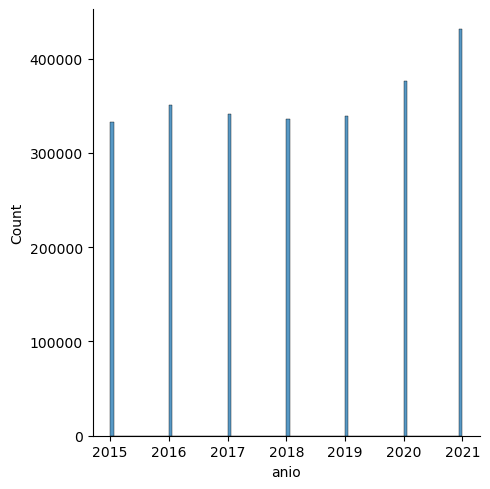

In [84]:
sns.displot(df['anio'])
sns.despine()

In [81]:
# Causas de defuncion segun año y genero

In [40]:
df.groupby(['anio'])['sexo'].value_counts()

anio  sexo           
2015  Varones            171282
      Mujeres            160870
      Sin especificar       174
2016  Varones            179824
      Mujeres            170622
      Sin especificar       236
2017  Varones            173888
      Mujeres            166693
      Sin especificar       715
2018  Varones            173406
      Mujeres            162215
      Sin especificar       435
2019  Varones            172659
      Mujeres            165225
      Sin especificar      1163
2020  Varones            195132
      Mujeres            177769
      Sin especificar      2949
2021  Varones            224366
      Mujeres            204196
      Sin especificar      2497
Name: sexo, dtype: int64

In [41]:
#Grafico Cantidad de defunciónes segun Causa

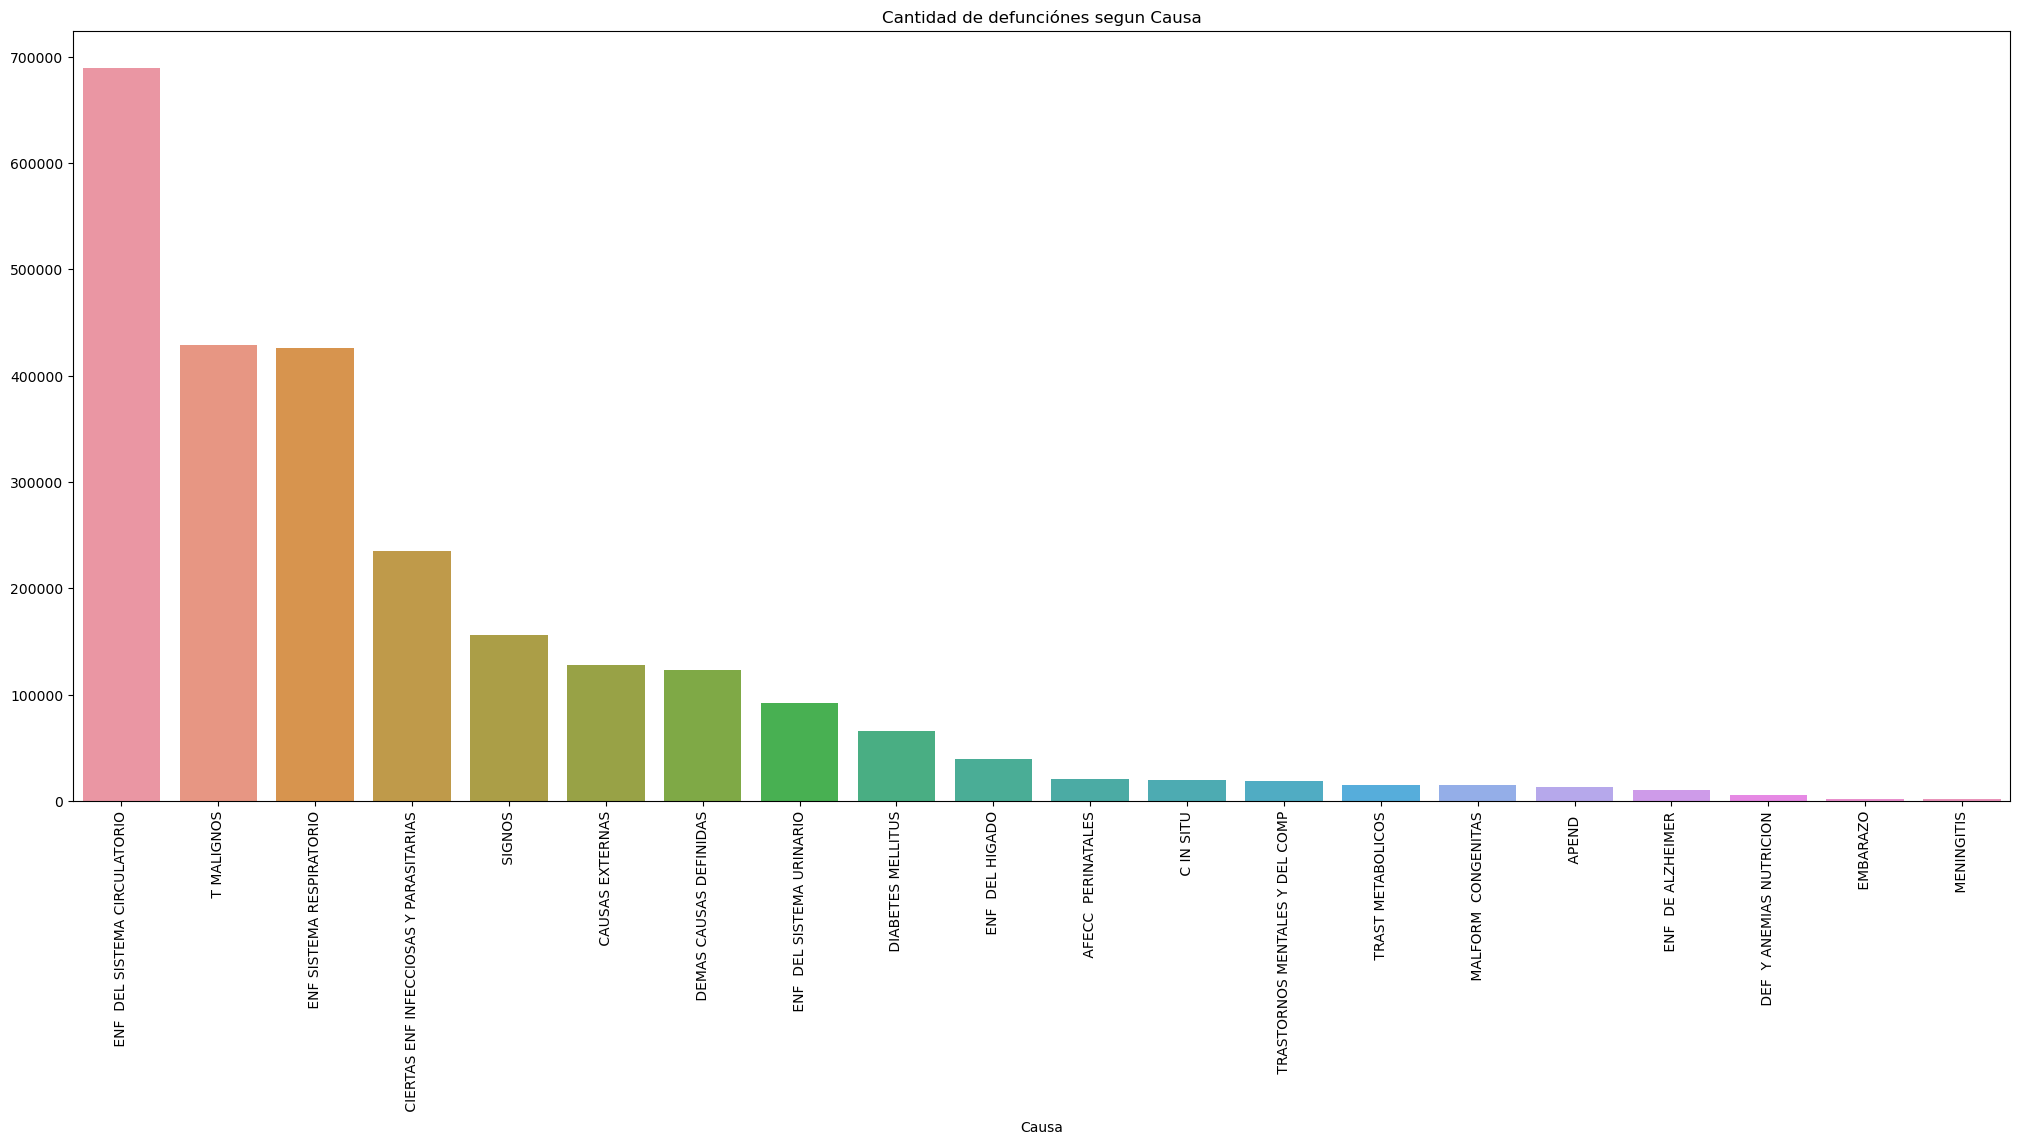

In [42]:
plt.figure(figsize=(25, 10))
sns.barplot(x=def_causa.index, y=def_causa.values)
plt.xlabel("Causa")
plt.title("Cantidad de defunciónes segun Causa")
plt.xticks(rotation=90)
plt.show()

In [43]:
#MUERTES SEGUN REGION Y CAUSAS

In [44]:
def_causa_reg=df.groupby(['region'])['causa_defuncion'].value_counts().head()

In [45]:
print(def_causa_reg)

region  causa_defuncion                        
Centro   ENF  DEL SISTEMA CIRCULATORIO             516844
         ENF SISTEMA RESPIRATORIO                  315064
         T MALIGNOS                                303114
         CIERTAS ENF INFECCIOSAS Y PARASITARIAS    164703
         SIGNOS                                    103733
Name: causa_defuncion, dtype: int64


In [ ]:
#Hacer grafico de barras apiladas

In [ ]:
#Mayores Causa de Muertes segun genero

In [71]:
sex = df.groupby(['sexo'])['causa_defuncion'].max().sort_values(ascending=False)
sex = sex.head(10)


In [ ]:
#Hacer grafico 

In [ ]:
#CORRELACIONES


In [ ]:
df.corr()

C:\Users\Sobran\AppData\Local\Temp\ipykernel_13108\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Index,grupo_etario,anio
Index,1.000000,-0.007881,0.988116
grupo_etario,-0.007881,1.000000,0.004514
anio,0.988116,0.004514,1.000000


C:\Users\Sobran\AppData\Local\Temp\ipykernel_13108\1795751418.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cbar= True, cmap='coolwarm')


<Axes: >

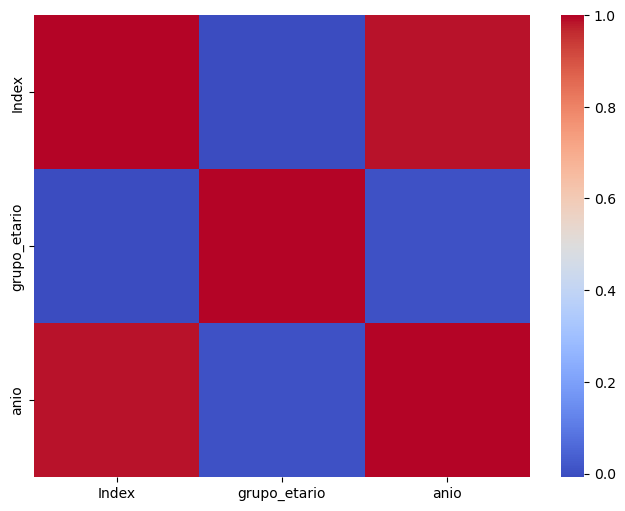

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cbar= True, cmap='coolwarm')

In [ ]:
#Ver analisis de Correlacion y redactar

In [87]:
#EDA con ydata-profiling

In [88]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: ydata-profiling in c:\users\sobran\anaconda3\lib\site-packages (4.5.1)



In [89]:
from ydata_profiling import ProfileReport

In [90]:
profile = ProfileReport(df, title="Profiling Report")

In [91]:
print(ProfileReport)

<class 'ydata_profiling.profile_report.ProfileReport'>


In [92]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]